In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
smile = pd.read_csv('C:/Users/6106057/nss-data-analytics/projects/smile-on-the-dazzling-dentures/Data/smile.csv')

C:\Users\6106057\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
smile.columns

Index(['Unnamed: 0', 'CallReportNum', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'CallerNum',
       'PhoneWorkerNum', 'CityName', 'CountyName', 'StateProvince',
       'CountryName', 'PostalCode', 'Narrative', 'EnteredByWorkerNum',
       'EnteredOn',
       'SMILE ON 60+ Demographic Information - # of People in Household',
       'Birth Year', 'SMILE ON 60+ Demographic Information - Other Language',
       'SMILE ON 60+ Screening - Last Screening Date',
       'SMILE ON 60+ Verification of Eligibility - Verification Date',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Do you need help in these other areas?',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and 

In [4]:
smile = smile.rename(columns ={'CallReportNum':'reportID','ReportVersion':'reg_clic',
                               'CallDateAndTimeStart':'callStart','CallDateAndTimeEnd':'callEnd',
                              'CityName':'city', 'CountyName':'county','CountryName':'country',
                              'PostalCode':'zipcode',
                               'SMILE ON 60+ Demographic Information - # of People in Household': 'num_household',
                               'Birth Year':'birth_year',
                               'SMILE ON 60+ Demographic Information - Other Language': 'language',
                               'SMILE ON 60+ Verification of Eligibility - Verification Date':'lastscreeningdate',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic':'dental_clinic',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?':'referral',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?' : 'mouth_teeth_quality',
                               'SMILE ON 60+ Demographic Information - Gender':'gender',
                               'SMILE ON 60+ Demographic Information - Race/Ethnicity': 'race',
                               'SMILE ON 60+ Demographic Information - Household Income Level':'income_level',
                               'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?':'last_time_visit',
                               'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?':'with_insurance',
                               'SMILE ON 60+ Screening - How often do you brush your teeth?': 'brush_teeth',
                               'SMILE ON 60+ Screening - Need for Periodontal Care':'future_care'})

In [5]:
smile.columns

Index(['Unnamed: 0', 'reportID', 'reg_clic', 'LinkedToCallReportNum',
       'callStart', 'callEnd', 'CallLength', 'CallerNum', 'PhoneWorkerNum',
       'city', 'county', 'StateProvince', 'country', 'zipcode', 'Narrative',
       'EnteredByWorkerNum', 'EnteredOn', 'num_household', 'birth_year',
       'language', 'SMILE ON 60+ Screening - Last Screening Date',
       'lastscreeningdate', 'dental_clinic', 'referral',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Do you need help in these other areas?',
       'mouth_teeth_quality',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?',
       'SMILE ON 60+ Case Management Information - Transportation Barriers',
       'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
       'gender', 'income_level',
       'SMILE ON 60+ Demographic Information - How did you first 

In [28]:
Callernum = smile.groupby(['gender','race'])["CallerNum"].nunique().reset_index()
Callernum

,gender,race,CallerNum
0,Female,African American,1766
1,Female,American Indian and Alaska Native,32
2,Female,Asian,92
3,Female,Caucasian,3776
4,Female,Hispanic,269
5,Female,Multi-racial,21
6,Female,Pacific Islander,6
7,Female,Unknown,61
8,Male,African American,891
9,Male,American Indian and Alaska Native,19


In [29]:
Callernum.CallerNum.sum()

9428

## Geo - gender, birth year and race

In [7]:
smile_geo = smile[smile.columns[smile.columns.isin(['gender','birth_year','race','CallerNum'])]]
smile_geo.head()

,CallerNum,birth_year,gender,race
0,3638169,1960.0,Female,African American
1,4431194,1959.0,Female,Caucasian
2,2941341,1942.0,Male,Asian
3,3823933,1960.0,Male,African American
4,3348256,1955.0,Female,African American


In [8]:
smile_geo.race.value_counts()
## a lot of duplicated calls. Value counts doesn't make sense

Caucasian                            32248
African American                     14670
Hispanic                              2657
Asian                                  836
Unknown                                833
American Indian and Alaska Native      170
Multi-racial                           147
Pacific Islander                        37
Name: race, dtype: int64

# put all the people 60+ 

In [9]:
over_60 = smile_geo[smile_geo['birth_year'] <= 1961.0]
over_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57791 entries, 0 to 57859
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CallerNum   57791 non-null  int64  
 1   birth_year  57791 non-null  float64
 2   gender      57278 non-null  object 
 3   race        51539 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [10]:
gender_race = over_60.groupby(['gender','race'])["CallerNum"].nunique().reset_index()
##gender_race = gender_race.sort_values(CallerNum) 
## lined up from the biggest to small number groups

In [11]:
gender_race = gender_race.sort_values("CallerNum", ascending = False)

<AxesSubplot:xlabel='race'>

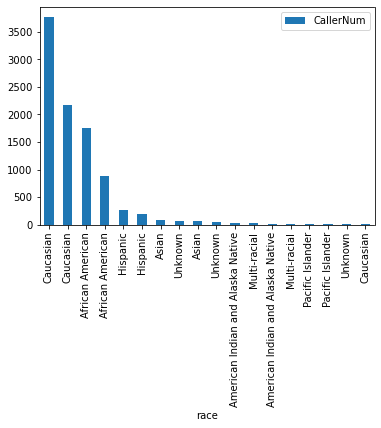

In [12]:
gender_race[["gender", "race", "CallerNum"]].plot(x="race", kind="bar")
## no very colorful to peresent the issue. 

<ipython-input-13-859bd929bc76>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_race.index,rotation=90)


Text(0.5, 1.0, 'The number patients of in differnt Genders')

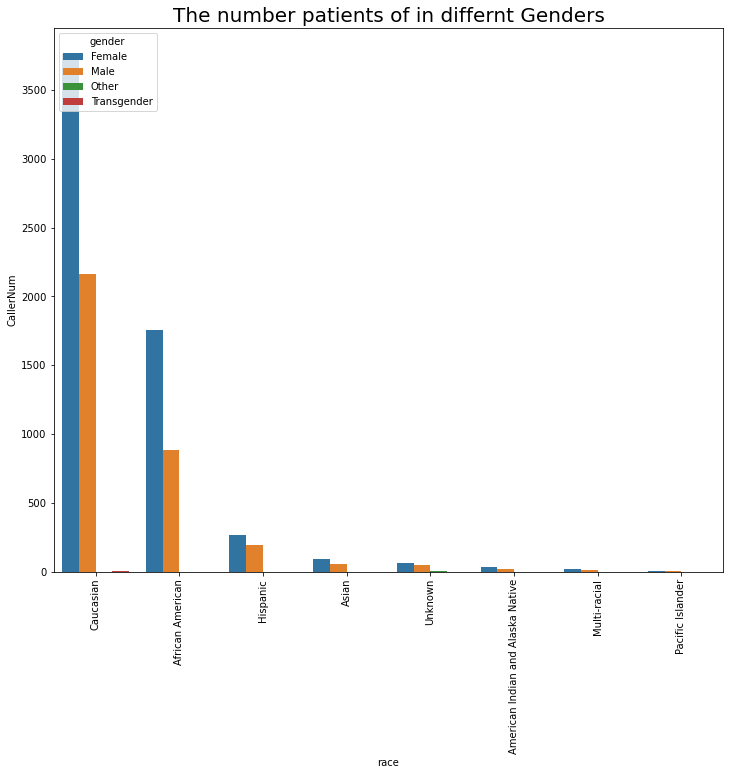

In [13]:
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.set_xticklabels(gender_race.index,rotation=90)
ax = sns.barplot(x="race", y="CallerNum" ,hue="gender", data=gender_race)
plt.title("The number patients of in differnt Genders", size=20)
## python barplot x rotation

# saving the picture: plt.savefig("The_number_patients_of_in differnt_Genders.png")

# look the income with insurance and last time get checked

In [14]:
smile['income_level'] = smile['income_level'].str.replace(" ", "") 
## replace the black space in the "21 280"
smile['income_level'].value_counts()
## there is blank space on the 21280 income level. 

$0-$21280        42590
$21246-$24280     7332
$24281-$27315     2323
$28806-$32920     2016
$32921-$37035      645
$36366-$41560      236
$41561-$46755      206
$43926-$50200       58
$50201-$56475       55
$51486-$58840       26
$58841-$66195       22
$59046-$67480       18
$76121-$85635        8
$84761-$95355        4
$66606-$76120        4
$67481-$75915        3
$74166-$84760        2
Name: income_level, dtype: int64

In [15]:
smile.income_level.head()

0    $0-$21280
1    $0-$21280
2    $0-$21280
3    $0-$21280
4    $0-$21280
Name: income_level, dtype: object

In [16]:
insurance = smile.groupby(['with_insurance'])["CallerNum"].nunique().reset_index()
insurance = insurance.rename(columns = {"CallerNum": "Numbers"})
print(insurance)

  with_insurance  Numbers
0             No     9170
1            Yes      863


# Insurance holders perectage 

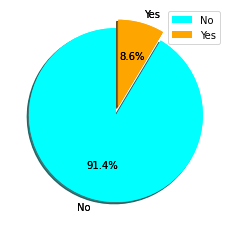

In [17]:
labels = insurance["with_insurance"]
sizes = insurance["Numbers"]
colors = ("cyan","orange") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1) 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) 
patches, texts, auto = ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.show()

## why only 2.2% holding insurance becasue of free med-care?

In [18]:
## low income level in the no insurance
no_insurance = smile[smile["with_insurance"] == 'No']
no_insurance.income_level.value_counts()

$0-$21280        40096
$21246-$24280     6570
$24281-$27315     2033
$28806-$32920     1705
$32921-$37035      566
$36366-$41560      189
$41561-$46755      158
$43926-$50200       50
$50201-$56475       41
$51486-$58840       22
$58841-$66195       18
$59046-$67480       15
$76121-$85635        7
$66606-$76120        4
$84761-$95355        3
$74166-$84760        2
$67481-$75915        2
Name: income_level, dtype: int64

In [19]:
no_insurance.last_time_visit.value_counts()

Less than 12 months    21354
More than 5 years      12260
1 to 2 years            9759
3 to 5 years            6779
Name: last_time_visit, dtype: int64

# The relationship between Income levelwith Insurance. 

In [20]:
yes_insurance = smile[smile["with_insurance"] == 'Yes']
yes_insurance.income_level.value_counts()

$0-$21280        655
$21246-$24280    194
$24281-$27315     78
$28806-$32920     56
$36366-$41560     21
$32921-$37035     21
$41561-$46755     20
$43926-$50200      4
$59046-$67480      2
$58841-$66195      2
$84761-$95355      1
$67481-$75915      1
$51486-$58840      1
$76121-$85635      1
Name: income_level, dtype: int64

In [21]:
yes_insurance.last_time_visit.value_counts()

Less than 12 months    510
More than 5 years      223
1 to 2 years           187
3 to 5 years           145
Name: last_time_visit, dtype: int64

# look the lowest income level with/without insurance for the last visit
$0-$21280 

In [22]:
no_low = smile.loc[(smile["with_insurance"] == 'No') & 
                   (smile["income_level"] == '$0-$21280')].last_time_visit.value_counts().reset_index()
no_low = no_low.rename(columns = {"last_time_visit": "no_last_time_visit"})
no_low

,index,no_last_time_visit
0,Less than 12 months,16246
1,More than 5 years,9471
2,1 to 2 years,7021
3,3 to 5 years,5157


In [23]:
yes_low = smile.loc[(smile["with_insurance"] == 'Yes') & 
                    (smile["income_level"] == '$0-$21280')].last_time_visit.value_counts().reset_index()
yes_low = yes_low.rename(columns = {"last_time_visit": "yes_last_time_visit"})
yes_low

,index,yes_last_time_visit
0,Less than 12 months,282
1,More than 5 years,142
2,1 to 2 years,110
3,3 to 5 years,92


# comparing with two of them for the last time visit

In [24]:
yorn = yes_low.merge(no_low, how = 'left', on = 'index')
##yorn.reset_index(inplace = True)
##yorn = yorn.dropna(columns )
yorn

,index,yes_last_time_visit,no_last_time_visit
0,Less than 12 months,282,16246
1,More than 5 years,142,9471
2,1 to 2 years,110,7021
3,3 to 5 years,92,5157


In [25]:
yorn.yes_last_time_visit.sum()

626

In [26]:
yorn.no_last_time_visit.sum()

37895

Text(0.5, 0, 'last_time_visit')

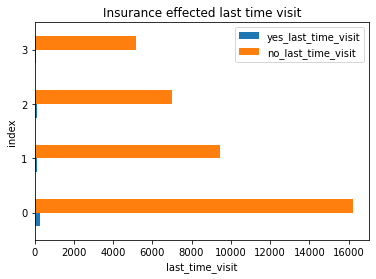

In [27]:
##yorn = yorn.rename(columns = {"yes_last_time_visit": "Visit last time with Insurance", "No_last_time_visit":"Visit last time without Insurance"})
yorn.plot(kind="barh")
plt.title("Insurance effected last time visit")
plt.ylabel("index")
plt.xlabel("last_time_visit")
## the number of people visit insanure is too small, not very good on the graph. 